 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
# YOUR CODE HERE
whale.isnull().count

<bound method DataFrame.count of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                       True                True   
2015-03-03                      False               False   
2015-03-04                      False               False   
2015-03-05                      False               False   
2015-03-06                      False               False   
...                               ...                 ...   
2019-04-25                      False               False   
2019-04-26                      False               False   
2019-04-29                      False               False   
2019-04-30                      False               False   
2019-05-01                      False               False   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                         True  

In [4]:
# Drop nulls
# YOUR CODE HERE
whale.dropna(inplace=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
# YOUR CODE HERE
algo.isnull().count

<bound method DataFrame.count of             Algo 1  Algo 2
Date                      
2014-05-28   False    True
2014-05-29   False    True
2014-05-30   False    True
2014-06-02   False    True
2014-06-03   False    True
...            ...     ...
2019-04-25   False   False
2019-04-26   False   False
2019-04-29   False   False
2019-04-30   False   False
2019-05-01   False   False

[1241 rows x 2 columns]>

In [7]:
# Drop nulls
# YOUR CODE HERE
algo.dropna(inplace=True)
algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500 = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [9]:
# Check Data Types
# YOUR CODE HERE
sp500.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE

sp500['Close'] = sp500['Close'].str.replace('$', '')
sp500['Close'] = sp500['Close'].astype(float)
sp500['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500.pct_change()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [12]:
# Drop nulls
# YOUR CODE HERE
sp500.dropna(inplace=True)
sp500.head()


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [13]:
# Rename Column
# YOUR CODE HERE
sp500_return = sp500.rename(columns={
    "Close": "SP 500"
})
sp500Change = sp500_return.pct_change()
sp500Change.dropna()

,SP 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale, algo, sp500Change], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

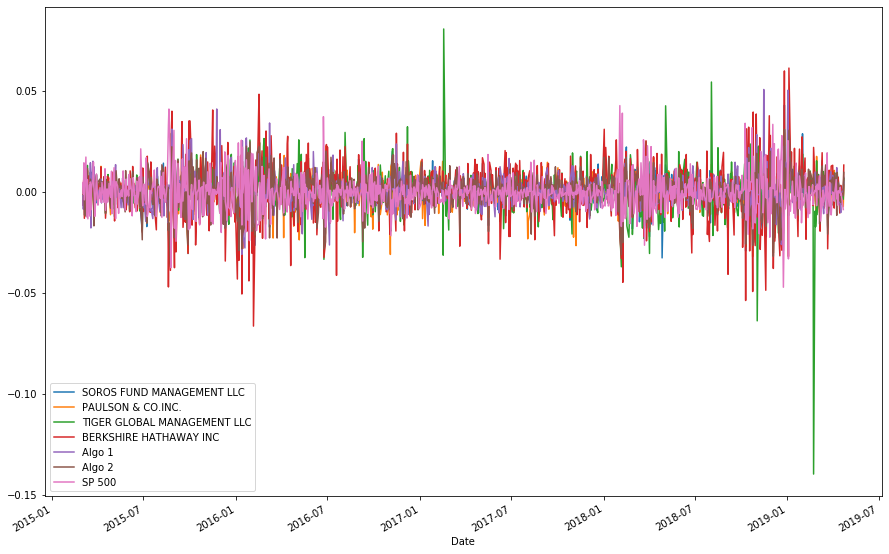

In [15]:
# Plot daily returns
# YOUR CODE HERE
combined_df.describe()
combined_df.plot(figsize=(15,10))

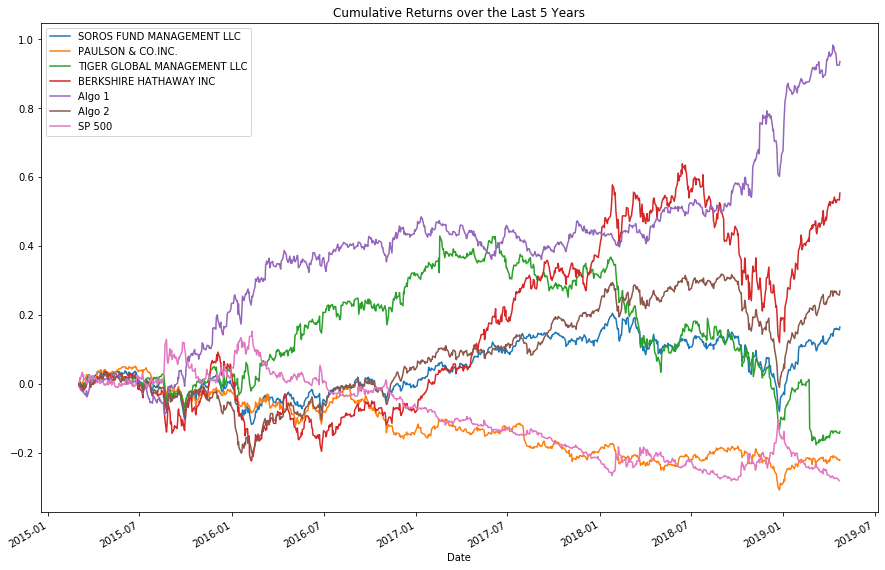

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.plot(figsize=(15,10), title="Cumulative Returns over the Last 5 Years")

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

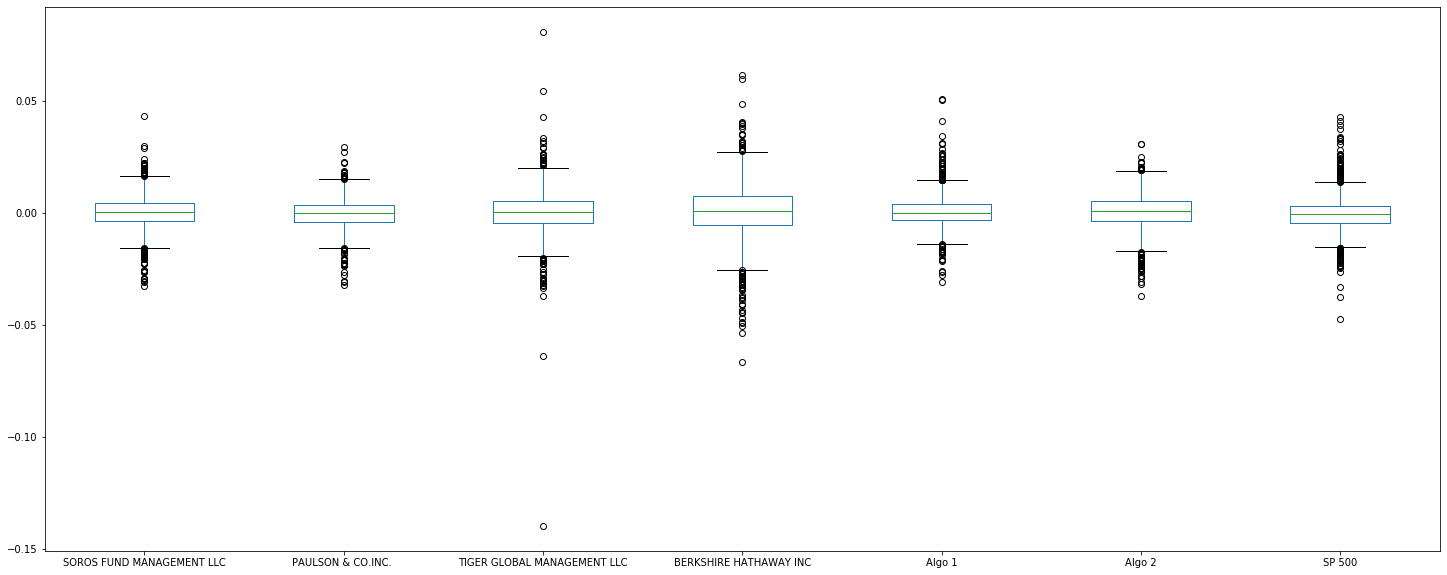

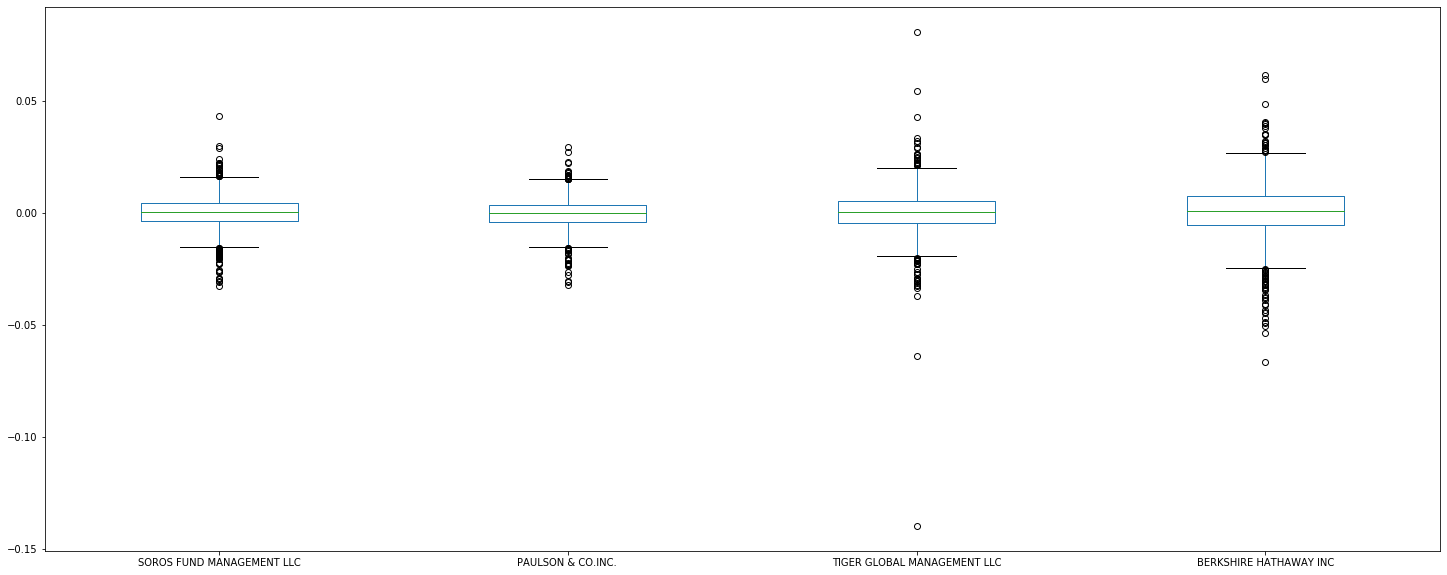

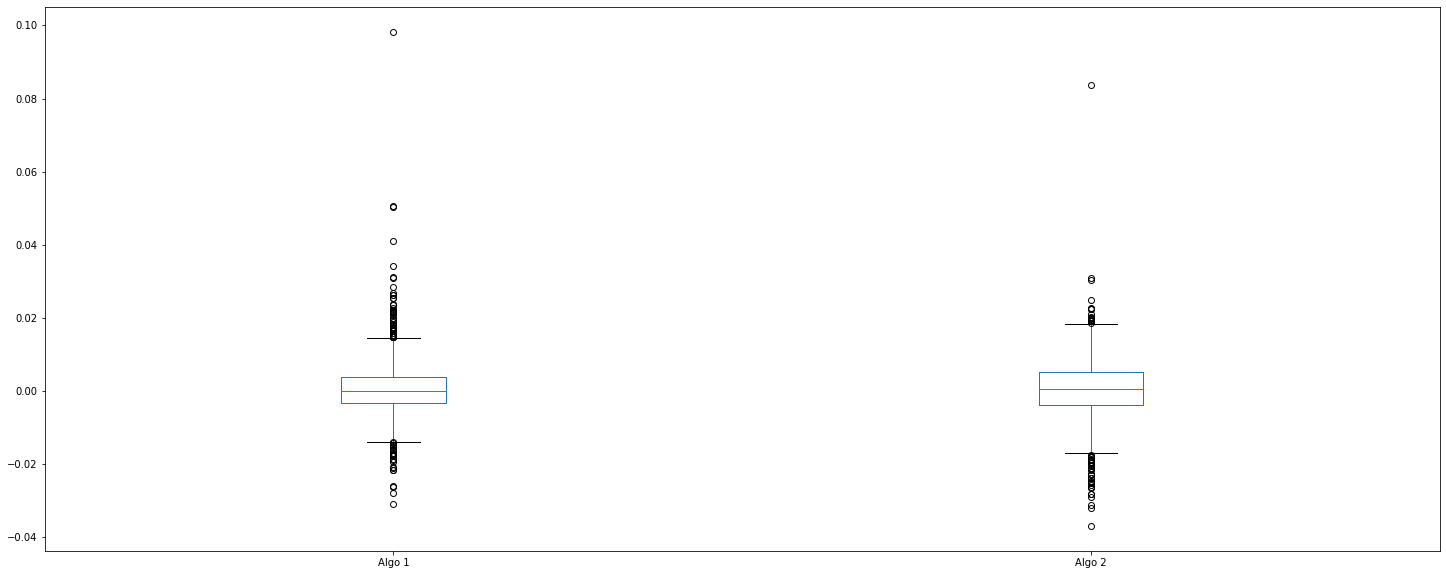

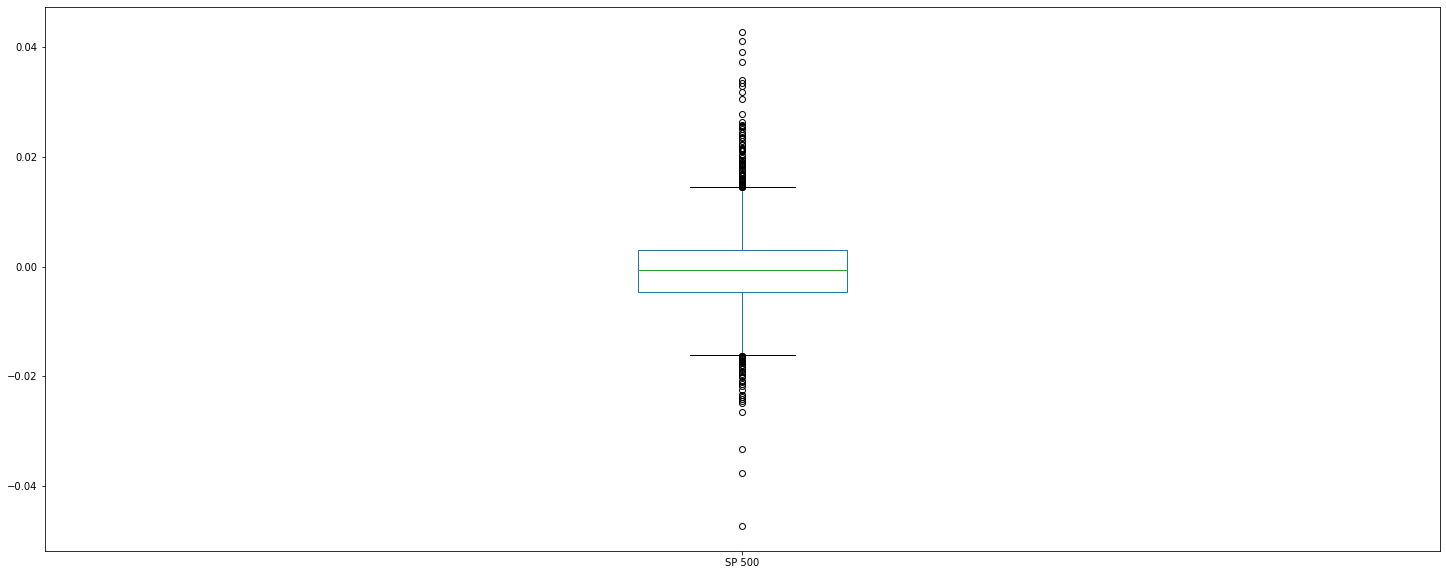

In [17]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_df.plot.box(figsize=(25,10))
whale.plot.box(figsize=(25,10))
algo.plot.box(figsize=(25,10))
sp500Change.plot.box(figsize=(25,10))

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_df.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
daily_std = daily_std.sort_values(ascending=True)
daily_std.head()

PAULSON & CO.INC.            0.007023
Algo 1                       0.007620
SOROS FUND MANAGEMENT LLC    0.007895
Algo 2                       0.008342
SP 500                       0.008587
dtype: float64

In [20]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
daily_std = daily_std * np.sqrt(252)
daily_std.head()

PAULSON & CO.INC.            0.111488
Algo 1                       0.120967
SOROS FUND MANAGEMENT LLC    0.125335
Algo 2                       0.132430
SP 500                       0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

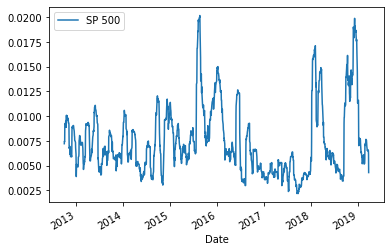

In [21]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
sp500Change.rolling(window=21).std().plot()

In [22]:
# Correlation
# YOUR CODE HERE
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192
SP 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [27]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
correlation1 = sp500Change.corr()
correlation2 = whale.corr()
correlation1
correlation2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

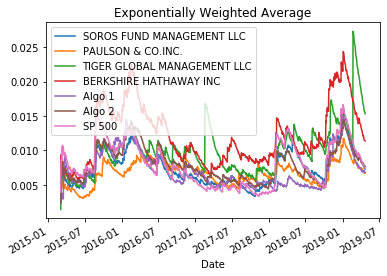

In [28]:
# (OPTIONAL) YOUR CODE HERE
combined_df.ewm(halflife=21).std().plot(title="Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [29]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP 500                        -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

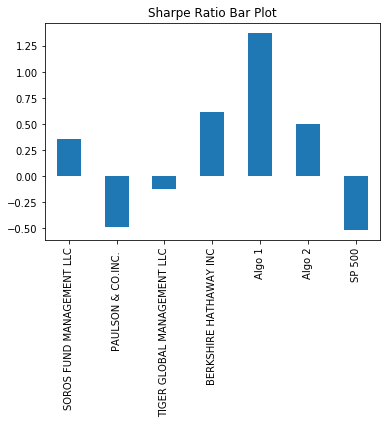

In [30]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratio Bar Plot")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Read the first stock
# YOUR CODE HERE

# Use the file path to read the CSV into a DataFrame
appl_historical = Path("Resources/aapl_historical.csv")
Apple = pd.read_csv(appl_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [32]:
# Read the second stock
# YOUR CODE HERE
cost_historical = Path("Resources/cost_historical.csv")
Cost = pd.read_csv(cost_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [33]:
# Read the third stock
# YOUR CODE HERE
goog_historical = Path("Resources/goog_historical.csv")
Google = pd.read_csv(goog_historical, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [34]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
allstock = pd.concat([Cost, Google, Apple], axis="columns", join="inner")
allstock.sort_index(inplace=True)
allstock.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,COST,195.76,GOOG,1098.26,AAPL,188.59
2018-05-14,COST,195.88,GOOG,1100.20,AAPL,188.15
2018-05-15,COST,195.48,GOOG,1079.23,AAPL,186.44
2018-05-16,COST,198.71,GOOG,1081.77,AAPL,188.18
2018-05-17,COST,199.60,GOOG,1078.59,AAPL,186.99


In [36]:
# Reset the index
# YOUR CODE HERE
allstock.reset_index()

,Trade DATE,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,2018-05-11,COST,195.76,GOOG,1098.26,AAPL,188.59
1,2018-05-14,COST,195.88,GOOG,1100.20,AAPL,188.15
2,2018-05-15,COST,195.48,GOOG,1079.23,AAPL,186.44
3,2018-05-16,COST,198.71,GOOG,1081.77,AAPL,188.18
4,2018-05-17,COST,199.60,GOOG,1078.59,AAPL,186.99
...,...,...,...,...,...,...,...
245,2019-05-03,COST,244.62,GOOG,1185.40,AAPL,211.75
246,2019-05-06,COST,244.23,GOOG,1189.39,AAPL,208.48
247,2019-05-07,COST,240.18,GOOG,1174.10,AAPL,202.86
248,2019-05-08,COST,241.34,GOOG,1166.27,AAPL,202.90


In [37]:
# Drop Nulls
# YOUR CODE HERE
allstock.drop(columns=['Symbol'], inplace=True)
allstock.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2018-05-11,195.76,1098.26,188.59
2018-05-14,195.88,1100.20,188.15
2018-05-15,195.48,1079.23,186.44
2018-05-16,198.71,1081.77,188.18
2018-05-17,199.60,1078.59,186.99


In [38]:
allstock.columns=('Cost', 'Google', 'Apple')
allstock.head()

,Cost,Google,Apple
Trade DATE,,,
2018-05-11,195.76,1098.26,188.59
2018-05-14,195.88,1100.20,188.15
2018-05-15,195.48,1079.23,186.44
2018-05-16,198.71,1081.77,188.18
2018-05-17,199.60,1078.59,186.99


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
portfolioreturn = allstock.pct_change().dropna()
portfolioreturn.head()

,Cost,Google,Apple
Trade DATE,,,
2018-05-14,0.000613,0.001766,-0.002333
2018-05-15,-0.002042,-0.019060,-0.009088
2018-05-16,0.016523,0.002354,0.009333
2018-05-17,0.004479,-0.002940,-0.006324
2018-05-18,-0.003206,-0.011339,-0.003637


In [40]:
weightedreturn = portfolioreturn.dot(weights)
weightedreturn.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# YOUR CODE HERE
joined_df = pd.concat([portfolioreturn, combined_df], axis="columns", join="inner")
joined_df.sort_index(ascending=True)
joined_df.columns = ['Cost', 'Google', 'Apple', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBALMANAGEMENT LLC', 'BERKSHIRE HATHAWAYINC', 'Algo 1', 'Algo 2', 'SP 500']
joined_df.head()

,Cost,Google,Apple,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBALMANAGEMENT LLC,BERKSHIRE HATHAWAYINC,Algo 1,Algo 2,SP 500
2018-05-14,0.000613,0.001766,-0.002333,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.002042,-0.019060,-0.009088,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.016523,0.002354,0.009333,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,0.004479,-0.002940,-0.006324,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.003206,-0.011339,-0.003637,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
joined_df.dropna()
joined_df.head()

,Cost,Google,Apple,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBALMANAGEMENT LLC,BERKSHIRE HATHAWAYINC,Algo 1,Algo 2,SP 500
2018-05-14,0.000613,0.001766,-0.002333,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.002042,-0.019060,-0.009088,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.016523,0.002354,0.009333,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,0.004479,-0.002940,-0.006324,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.003206,-0.011339,-0.003637,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [43]:
# Risk
# YOUR CODE HERE
Risk = joined_df.std() * np.sqrt(252)
Risk

Cost                          0.212034
Google                        0.255500
Apple                         0.296951
SOROS FUND MANAGEMENT LLC     0.146675
PAULSON & CO.INC.             0.116732
TIGER GLOBALMANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAYINC         0.247155
Algo 1                        0.133704
Algo 2                        0.139556
SP 500                        0.152469
dtype: float64

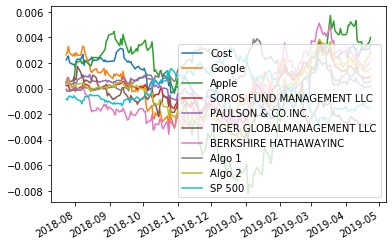

In [44]:
# Rolling
# YOUR CODE HERE
joined_df.rolling(window=50).mean().plot()

In [48]:
# Beta
# YOUR CODE HERE
covariance = joined_df.cov()
covariance

,Cost,Google,Apple,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBALMANAGEMENT LLC,BERKSHIRE HATHAWAYINC,Algo 1,Algo 2,SP 500
Cost,0.000178,0.000088,0.000108,0.000064,0.000049,6.911146e-05,0.000090,0.000016,0.000058,-8.980350e-06
Google,0.000088,0.000259,0.000208,0.000102,0.000066,6.861922e-05,0.000207,0.000037,0.000097,-5.122741e-06
Apple,0.000108,0.000208,0.000350,0.000105,0.000075,9.175589e-05,0.000202,0.000035,0.000105,1.625552e-05
SOROS FUND MANAGEMENT LLC,0.000064,0.000102,0.000105,0.000085,0.000054,6.477906e-05,0.000117,0.000026,0.000070,-2.509830e-06
PAULSON & CO.INC.,0.000049,0.000066,0.000075,0.000054,0.000054,5.228143e-05,0.000075,0.000022,0.000051,-4.234986e-06
TIGER GLOBALMANAGEMENT LLC,0.000069,0.000069,0.000092,0.000065,0.000052,2.145661e-04,0.000074,0.000014,0.000053,8.286348e-07
BERKSHIRE HATHAWAYINC,0.000090,0.000207,0.000202,0.000117,0.000075,7.422361e-05,0.000242,0.000043,0.000107,-5.810344e-06
Algo 1,0.000016,0.000037,0.000035,0.000026,0.000022,1.413295e-05,0.000043,0.000071,0.000027,-4.414382e-06
Algo 2,0.000058,0.000097,0.000105,0.000070,0.000051,5.273270e-05,0.000107,0.000027,0.000077,-3.590490e-06
SP 500,-0.000009,-0.000005,0.000016,-0.000003,-0.000004,8.286348e-07,-0.000006,-0.000004,-0.000004,9.224866e-05


In [49]:
variance = joined_df.var()
variance

Cost                          0.000178
Google                        0.000259
Apple                         0.000350
SOROS FUND MANAGEMENT LLC     0.000085
PAULSON & CO.INC.             0.000054
TIGER GLOBALMANAGEMENT LLC    0.000215
BERKSHIRE HATHAWAYINC         0.000242
Algo 1                        0.000071
Algo 2                        0.000077
SP 500                        0.000092
dtype: float64

In [50]:
portfoliobeta = covariance / variance
portfoliobeta

,Cost,Google,Apple,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBALMANAGEMENT LLC,BERKSHIRE HATHAWAYINC,Algo 1,Algo 2,SP 500
Cost,1.000000,0.340312,0.309835,0.749076,0.902417,0.322099,0.370576,0.221261,0.754294,-0.097349
Google,0.494136,1.000000,0.595832,1.189608,1.212851,0.319805,0.852228,0.521190,1.249023,-0.055532
Apple,0.607696,0.804843,1.000000,1.233205,1.386282,0.427635,0.833900,0.498351,1.360767,0.176214
SOROS FUND MANAGEMENT LLC,0.358449,0.392044,0.300870,1.000000,0.995112,0.301907,0.484660,0.370600,0.906860,-0.027207
PAULSON & CO.INC.,0.273510,0.253165,0.214220,0.630285,1.000000,0.243661,0.307355,0.315439,0.655489,-0.045908
TIGER GLOBALMANAGEMENT LLC,0.387381,0.264889,0.262220,0.758790,0.966872,1.000000,0.306200,0.199226,0.682309,0.008983
BERKSHIRE HATHAWAYINC,0.503503,0.797463,0.577673,1.376135,1.377839,0.345924,1.000000,0.604468,1.386347,-0.062986
Algo 1,0.087979,0.142726,0.101031,0.307950,0.413832,0.065868,0.176898,1.000000,0.350183,-0.047853
Algo 2,0.326759,0.372638,0.300548,0.820967,0.936884,0.245764,0.442012,0.381511,1.000000,-0.038922
SP 500,-0.050336,-0.019775,0.046455,-0.029399,-0.078320,0.003862,-0.023970,-0.062228,-0.046457,1.000000


In [51]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
annual_sharpe_ratios = (joined_df.mean() * 252) / (joined_df.std() * np.sqrt(252))
annual_sharpe_ratios

Cost                          1.244419
Google                        0.714034
Apple                         0.490850
SOROS FUND MANAGEMENT LLC     0.430713
PAULSON & CO.INC.             0.258738
TIGER GLOBALMANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAYINC         0.159756
Algo 1                        2.035665
Algo 2                        0.080607
SP 500                       -0.427676
dtype: float64

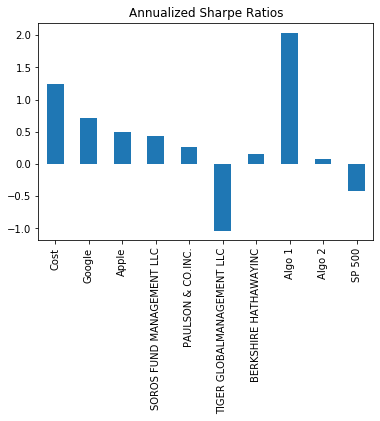

In [54]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
annual_sharpe_ratios.plot(kind="bar", title= "Annualized Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [42]:
# YOUR CODE HERE
